## DIAGNOSES_ICD Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_icd = pd.read_csv('DIAGNOSES_ICD.csv')
data_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [3]:
data_icd.dropna(inplace=True)
data_icd = data_icd.reset_index(drop=True)

In [4]:
data_icd['ICD9_3DIGIT'] = data_icd['ICD9_CODE'].str[:3]
data_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_3DIGIT
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425


In [5]:
icd9_counts = data_icd['ICD9_3DIGIT'].value_counts().head(20)

icd9_counts_df = icd9_counts.reset_index()
icd9_counts_df.columns = ['ICD9_3DIGIT', 'Frequency']

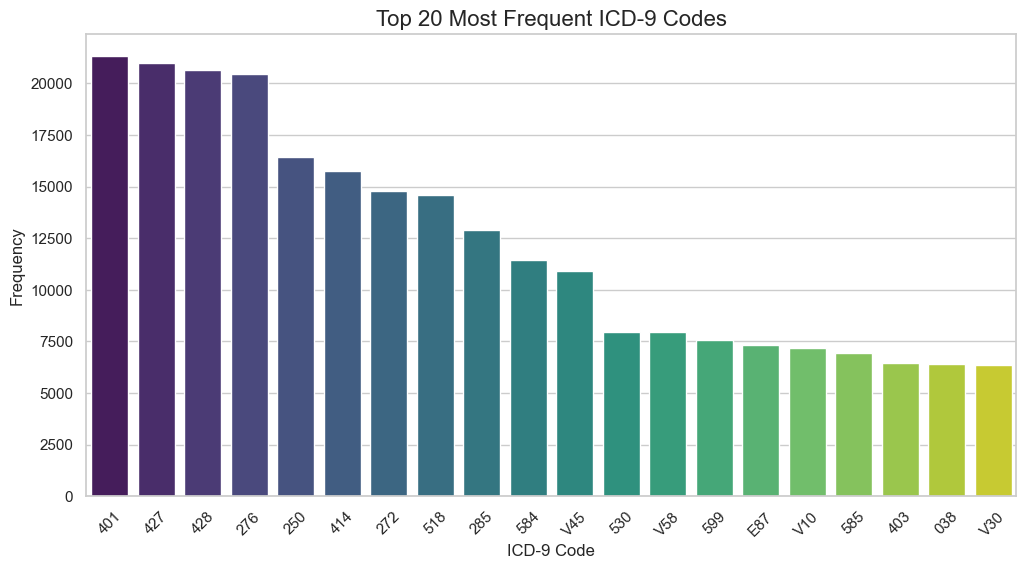

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='ICD9_3DIGIT',
    y='Frequency',
    data=icd9_counts_df,
    palette='viridis'
)

# Add labels and title
plt.title('Top 20 Most Frequent ICD-9 Codes', fontsize=16)
plt.xlabel('ICD-9 Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
icd_counts = data_icd['ICD9_3DIGIT'].value_counts()

top_20_icd = icd_counts.head(20).index

data_icd = data_icd[data_icd['ICD9_3DIGIT'].isin(top_20_icd)]

data_icd = data_icd.reset_index(drop=True)

data_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_3DIGIT
0,1297,109,172335,1.0,40301,403
1,1300,109,172335,4.0,5855,585
2,1302,109,172335,6.0,2762,276
3,1304,109,172335,8.0,2767,276
4,1308,109,172335,12.0,28521,285


In [8]:
data_icd.shape

(244471, 6)

In [9]:
data_icd = data_icd.drop(['SEQ_NUM', 'ROW_ID', 'ICD9_CODE'], axis=1)
data_icd = data_icd.reset_index(drop=True)

data_icd.head()

,SUBJECT_ID,HADM_ID,ICD9_3DIGIT
0,109,172335,403
1,109,172335,585
2,109,172335,276
3,109,172335,276
4,109,172335,285


In [10]:
data_icd = data_icd.drop_duplicates(subset=['HADM_ID', 'ICD9_3DIGIT'], keep='first')
data_icd = data_icd.reset_index(drop=True)

In [11]:
data_icd.head()

,SUBJECT_ID,HADM_ID,ICD9_3DIGIT
0,109,172335,403
1,109,172335,585
2,109,172335,276
3,109,172335,285
4,109,173633,403


In [22]:
patient_data = data_icd[data_icd['HADM_ID'] == 167853]
patient_data

,SUBJECT_ID,HADM_ID,ICD9_3DIGIT
78149,22532,167853,427
78150,22532,167853,276


## NOTEEVENTS Dataset

In [12]:
dtype_dict = {
    'CHARTTIME': str,    # Treat CHARTTIME as string (or datetime if you want to parse it later)
    'STORETIME': str,    # Similarly for STORETIME
}

data_notes = pd.read_csv('NOTEEVENTS.csv', dtype=dtype_dict)
data_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [14]:
data_notes = data_notes[data_notes['CATEGORY'] == 'Discharge summary']
data_notes['HADM_ID'] = data_notes['HADM_ID'].astype(int)

In [15]:
data_notes = data_notes.drop(['CHARTTIME', 'SUBJECT_ID', 'STORETIME', 'DESCRIPTION', 'CGID', 'ISERROR', 'ROW_ID'], axis=1)
data_notes = data_notes.reset_index(drop=True)
data_notes.head()

,HADM_ID,CHARTDATE,CATEGORY,TEXT
0,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...
1,107527,2118-06-14,Discharge summary,Admission Date: [**2118-6-2**] Discharg...
2,167118,2119-05-25,Discharge summary,Admission Date: [**2119-5-4**] D...
3,196489,2124-08-18,Discharge summary,Admission Date: [**2124-7-21**] ...
4,135453,2162-03-25,Discharge summary,Admission Date: [**2162-3-3**] D...


In [21]:
patient_data = data_notes[data_notes['HADM_ID'] == 167853]
patient_data

,HADM_ID,CHARTDATE,CATEGORY,TEXT
0,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...
245,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...


In [17]:
data_notes.shape

(59652, 4)

## Join the two datasets

In [26]:
data = pd.merge(data_notes, data_icd, on='HADM_ID', how='inner')

data.head()

,HADM_ID,CHARTDATE,CATEGORY,TEXT,SUBJECT_ID,ICD9_3DIGIT
0,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,427
1,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,276
2,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,427
3,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,276
4,107527,2118-06-14,Discharge summary,Admission Date: [**2118-6-2**] Discharg...,13702,518


In [27]:
patient_data = data[data['HADM_ID'] == 167853]
patient_data

,HADM_ID,CHARTDATE,CATEGORY,TEXT,SUBJECT_ID,ICD9_3DIGIT
0,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,427
1,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,276
2,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,427
3,167853,2151-08-04,Discharge summary,Admission Date: [**2151-7-16**] Dischar...,22532,276


In [29]:
data.shape

(233899, 6)

In [30]:
# Group by HADM_ID and aggregate the ICD9_CODE and ICD9_3DIGIT (combine into lists or strings)
data = data.groupby(['HADM_ID']).agg({
    'ICD9_3DIGIT': lambda x: ', '.join(map(str, x.unique())),  # Concatenate unique ICD9 codes
    'TEXT': 'first',  # Keep the first TEXT (discharge summary)
    'SUBJECT_ID': 'first'  # Keep the first SUBJECT_ID
}).reset_index()

In [31]:
data.head()

,HADM_ID,ICD9_3DIGIT,TEXT,SUBJECT_ID
0,100001,"250, 584, V58, 403, 585",Admission Date: [**2117-9-11**] ...,58526
1,100003,"285, 401",Admission Date: [**2150-4-17**] ...,54610
2,100006,"518, 276",Admission Date: [**2108-4-6**] Discharg...,9895
3,100007,401,Admission Date: [**2145-3-31**] ...,23018
4,100009,"414, 250, V45, 285, 401, 272, V58",Admission Date: [**2162-5-16**] ...,533


In [32]:
patient_data = data[data['HADM_ID'] == 167853]
patient_data

,HADM_ID,ICD9_3DIGIT,TEXT,SUBJECT_ID
32694,167853,"427, 276",Admission Date: [**2151-7-16**] Dischar...,22532


In [33]:
data.shape

(48335, 4)

In [34]:
data['ICD9_3DIGIT'] = data['ICD9_3DIGIT'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Step 2: Get all unique ICD9_3DIGIT codes across the dataset
unique_icd9_codes = set([code for sublist in data['ICD9_3DIGIT'] for code in sublist])
unique_icd9_codes

{'038',
 '250',
 '272',
 '276',
 '285',
 '401',
 '403',
 '414',
 '427',
 '428',
 '518',
 '530',
 '584',
 '585',
 '599',
 'E87',
 'V10',
 'V30',
 'V45',
 'V58'}

In [35]:
for code in unique_icd9_codes:
    column = f"ICD9_{code}"
    data[column] = data['ICD9_3DIGIT'].apply(lambda x: 1 if code in x else 0)

In [36]:
data = data.drop(['ICD9_3DIGIT'], axis=1)
data = data.reset_index(drop=True)

In [37]:
data.to_csv('data.csv', index=False)